---
execute:
  echo: true
jupyter: python3
---

# Questions - Chapter 4
::: {.callout-warning}
## Back to blog post
[fastai book chapter 4](../under_the_hood_training_a_digit_classifier_post.ipynb)
:::

::: {.callout-note}
## Links
- Source: [Fastbook Chapter 4 questionnaire solutions (wiki)](https://forums.fast.ai/t/fastbook-chapter-3-questionnaire-solutions-wiki/68042)
:::

In [64]:
#| code-fold: true

from fastai.vision.all import *

<b>
1. How is a grayscale image represented on a computer? How about a color image?
</b>

Images are represented by arrays with pixel values representing the content of the image. For greyscale images, a 2-dimentional array is used with the pixeles representing the grayscale values, with a range of 256 integers. A value of 0 would represent white and a value of 255 represent black, and different shades of greyscale in between. For color images, three color channels (red,green,blue) are typicall used, with a separate 256-range 2D array used for each channel. A pixel of 0 again represent white, with 255 representing solid red, green or blue. The 2D arrays from a final 3D array (rank 3 tensor) representing the color image.

<b>
2. How are the files an folders in the MNIST_SAMPLE dataset structured? Why?
</b>

There are two subfolders, train and valid, the former contains the data for modeling training, the latter contains the data for validating model performance after each training step. Evaluating the model on the validation set serves tow purposes: a.) to report a human interpretable metric such as accuracy (in contract to the often abstract loss functions used for training), b.) to facilitate the detection of overfitting by evaluating the model on da dataset it hasn't been trained on (in short, an overfitting model performs increasingly well on the training set but decreasingly so an the validation set). Of course, every practitioner could generate their own train/validation-split of the data. Public datasets are usually pre-split to simplifying comparing results between implementations/publications.

<b>
3. Explain how the "pixel similarity" approach to classifying digits works.
</b>

In the pixel similarity approach, we generate an archetype for each class we want to identify. In our case, we want to distinguish images of 3's from images of 7's. We define the archetypical 3 as the pixel-wise mean values of all 3's in the training set. Analog for the 7's. You can visualize the tow archetypes and see that they are in fact blurred version of the number they represent. In order to tell if previously unseen image is a 3 or a 7, we calculate its distance to the tow archetypes (here: mean pixel-wise absolute difference). We say the new images are a 3 if the distance to the archetypical 3 is lower that tow the archetypical 7.

<b>
4. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
</b>

List (arrays in other programming languages) are often generated using a for-loop. A list comprehension in Python is condensing the creation of list using a for-loop into a single expression. List comprehension will also  often include if clauses for filtering.

```python
lst_in = range(10)
lst_out = [2*el for el in lst_in if el%2==1]
```

```python
list = []
for el in lst_in:
    if el%2==1:
        lst_out.append(2*el)
        
lst_out
```

<b>
5. What is a rank-3 tensor?
</b>

The rank of a tensor is the number of dimension it has. An easy way to identify the rank is the number of indices you would need to reference a number within a tensor. A scalar can be represented as a tensor of rank 0 (no index), a vector can be represented as a tensor of rank 1 (in index e.g. v[i]), a matrix can be represented as tensor of rank 2 (two indices, e.g. a[i,j]), and a tensor of rank 3 in a cuboid of a "stacked of matrices" (there indices, e.g. b[i,j,k]). In particular, the rank of a tensor is independent of its shape of dimensionality, e.g. a tensor of shape 2x2x2 and a tensor of shape 2x5x7 both have rank 3.

<b>
6. What is the difference between tensor rank and shape? How do you get the rank from the shape?
</b>

- Rank is the number of axes of dimension in a tensor
- Shape is the size of each axis of a tensor

In [65]:
path = untar_data(URLs.MNIST_SAMPLE)
threes = (path/'train'/'3').ls().sorted()
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

We just need to find its length to know its rank, This id done as follows:

In [66]:
len(stacked_threes.shape)

3

You can also get a tensor's rank directly with ndim.

In [67]:
stacked_threes.ndim

3

so stacked_threes 
- has a rank of 3.
- and has a shape of [6131,28,28]
    - dim 1 has a length of 6131
    - dim 2 has a length of 28
    - dim 3 has a length of 28

<b>
7. What is RMSE and L1 norm?
</b>

Root mean squared error (RMSE), also called the L2 norm, and mean absolute difference (MAE), also called the L1 norm, are tow commonly used methods of measuring "distance". Simple difference do not work because some difference are positive and others are negative, canceling each other out. Therefore, a function that focuses on the magnitude of the differences in needed to properly measure distances. The simplest would be to add the absolute value of the differences, which is what MAE is. RMSE takes the mean of the square (makes everything positive) and then takes the square root (undoes squaring).

<b>
8. How can you apply a calculation on thousand of numbers at once. many thousand of times faster than python loop?
</b>

As loops are very slow in Python, it is best to represent the operations as array operations rather than looping through individual elements. If this can be done, then using NumPy of PyTorch will be thousand of time faster, as they use underlying C code which is much faster than pure Python. Even better, PyTorch allows you to run operations on GPU, which will have significant speedup if there are parallel operations that can be done.

<b>
9. Create a 3x3 tensor array containing the numbers from 1 to 9. Double it. Select the bottom right our numbers.
</b>

In [68]:
a = torch.Tensor(list(range(1,10))).view(3,3);

print(a)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [69]:
b = 2 * a

print(b)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])


In [70]:
b[1:,1:]

tensor([[10., 12.],
        [16., 18.]])

<b>
10. What is broadcasting?
</b>

Sientific/numerical Python packages like NumPy and PyTorch will often implement broadcasting that often makes code easier to write. In the case of PyTorch, tensor with saller rank are expanded to have the same size as the larger tensor. In this way, operations can be performed between tensor with different rank.

<b>
11. Are metrics generally calculated using the trining set or the validation set? Why?
</b>

Metrics are generally calculated on a validation set. As the validation set is unseen data for the model, evaluating the metrics on the validation set is better in order to determine if there is any overfitting and how well the model might generalize if given similar data.

<b>
12. What is SGD?
</b>

SGD, or stochastic gradient decent, is an optimization algorithm. Specifically, SGD is an algorithm that will update the parameters of a model in order to minimize a given loss function that was evaluated on the prediction and target. The key idea behind SGD (and many optimization algorithms, for that matter) is that the gradient of the loss function provides and indication of how that loss function changes in the parameter space, which we use to determine how best to update the parameters in order to minimize the loss function. This is what SGD does.

<b>
13. Why does SGD use mini-batches?
</b>

We need to calculate our loss function (and our gradient) on one or more data points. We cannot calculate on the whole dataset due to compute limitations and time constraints. If we iterated through each data point, however, the gradients will be unstable and imprecise, and is not suitable for training. As a compromise, we calculate the average loss for a small subset of the dataset at a time. This subset is called a mini-batch. Using a mini-batches are also more computationally efficient that single items on a GPU.

<b>
14. What are the seven steps in SGD for machine learning?
</b>

1. Initialize the weights.
2. Use the weights to predict.
3. Based on the prediction, calculate the loss (how good the model is).
4. Calculate the gradient which measures for each weight how changing that weight would change the loss.
5. Step all the weights based on that calculation.
6. Go back to step 2.
7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

<b>
15. How do we initialize the weights in a model?
</b>

We initialize the parameters to random values.

<b>
16. What a loss?
</b>

The loss gives a number of how good the effectiveness of a current weight assignment is in terms of actual performance. The loss function should return a number that is small if the performance of the model is good. (the standard approach ist to teat a small loss as good and a large loss as bad)

<b>
17. Why can't we use a high learning rate?
</b>

The size of the step we take when applying SGD to update the parameters of the model.The learning rate is often a number between 0.001 and 0.1, although is could be anything. Often people select a learning rate just by typing a few, and finding which results in the best model after training.

<b>
18. What is a gradient?
</b>

The derivative of the loss with respect to some parameter of the model. The gradients are calculated in the backpropagation (this function could also be called calculate_gradients).
The gradients tell us only the slope of the function, they don't tell exactly how far to adjust the parameters. But they give us some idea of how far: if the slope is very large, that may suggest that we have more adjustments to do, whereas it the slope is very small, that may suggest that we are close to the optimal value.

<b>
19. Do you need to know how to calculate gradients yourself?
</b>

Manual calculation of the gradients are not required, as deep learning libraries will aromatically calculate the gradients for you. This feature is known as automatic differentiation. In PyTorch, if requires_grad=True, the gradients can be returned by calling the backward method (backpropagation).

<b>
20. Why can't we use accuracy as a loss function?
</b>

A loss function needs to change as the weights are being adjusted. Accuracy only changes if the predictions of the model change. So if there are slight changes to the model, say it improves confidence in a prediction, but does not change the prediction, the accuracy will still not change. Therefore, the gradients will be zero everywhere except when the actual predictions change. The model therefore cannot learn form the gradients equal to zero, and the model's weights will not update and will not train. A good loss function gives a slightly better loss when the model gives slightly better prediction. Slightly better predictions mean if the model is more confident about the correct prediction. For example, predicting 0.9 vs 0.7 for a probability the loss function needs to reflect that.

<b>
21. Draw the sigmoid function. What is special about its shape?
</b>

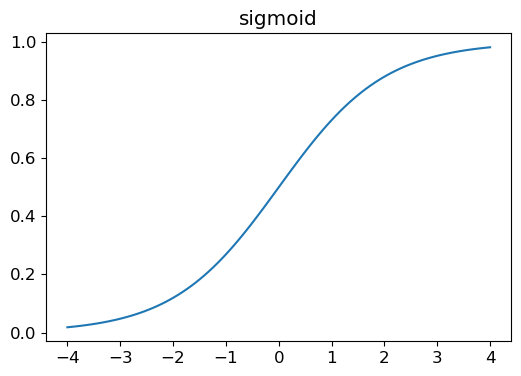

In [71]:
from fastai.vision.all import *
from fastbook import *

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max,100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

plot_function(torch.sigmoid, title='sigmoid', min=-4,max=4)

Sigmoid function is a smooth curve that squishes all values into values between 0 and 1. Most loss functions assume that the model is outputting some form of a probability or confidence level between 0 and 1 so we use the sigmoid function at the end of the model in order to always output a number between 0 and 1.

<b>
22. What is the difference between a loss function and a metric?
</b>

Metric drive human understanding and the loss is to drive automated learning.

loss:
the loss must be a function that has a meaningfull derivative. It can't have big flat sections and large jumps, but instead must be reasonably smooth. This is why we use loss functions that would respond to small changes in confidence level. The loss function is calculated for each item in our dataset, and then at the end of an epoch, the loss values are all averaged and the overall mean is reported for the epoch.

metric:
Metrics are the values that are printed at the end of each epoch that tell us how our model is doing. It is important that we learn to focus on these metrics, rather than the loss, when judging the performance of a model.

<b>
23. What is the function to calculate new weights using a learning rate?
</b>

The optimizer step function.

<b>
24. What does the DataLoader class do?
</b>

The DataLoader class can take any Python collection and turn it into an iterator over many batches.

<b>
25. Write pseudocode showing the basic steps taken in each epoch for SGD.
</b>

```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```

<b>
26. Create a function that, if passed two arguments [1,2,3,4] and 'abcd' returns [(1,'a'),(2,'b'),(3,'c'),(4,'d')]. What is special about that output data structure?
</b>

In [72]:
def func(a,b): return list(zip(a,b))

func([1,2,3,4],'abcd')

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

This data structure is useful for machine learning models when you need list of tuples where each tuple would contain input data and a label.

<b>
27. What does view do in PyTorch?
</b>

It changes the shape of a Tensor without changing its contents.

In [73]:
x = torch.randn(4,4)
x

tensor([[ 0.0109, -0.3387, -1.3407, -0.5854],
        [ 0.5362,  0.5246,  1.1412,  0.0516],
        [ 0.7440, -0.4816, -1.0495,  0.6039],
        [-1.7223, -0.8278,  1.3347,  0.4835]])

In [74]:
x. size()

torch.Size([4, 4])

In [75]:
y = x.view(16)
y

tensor([ 0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412,  0.0516,  0.7440, -0.4816, -1.0495,  0.6039, -1.7223, -0.8278,  1.3347,  0.4835])

In [76]:
y.size()

torch.Size([16])

<b>
28. What are the bias parameters in a neural network? Why do we need them?
</b>

Without the bias parameters, if the input is zero, the output will always be zero. Therefore, using the bias parameter adds additional flexibility to the model.

<b>
29. What does the @ operator do in Python?
</b>

It is the operator for matrix multiplication.

<b>
30. What does the backward method do?
</b>

The backward method calculates the gradients.

<b>
31. Why do we have to zero the gradients?
</b>

PyTorch will add the gradients of a variable to any previously stored gradients. If the training loop function is called multiple times, without zeroing the gradients, the gradients of current loss would be added to the previously stored gradient values.

<b>
32. What information do we have to pass to Learner?
</b>

We need to pass:

- the DataLoaders
- the model
- the optimization function
- the loss function
- and optionally any metrics to print

<b>
33. Show Python or pseudocode for the basic steps of a training loop.
</b>

```python
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model) 
        for p in params:
            p.data -= p.grad * lr
            p.grad_zero_()

for i in range(20):
    train_epoch(model,lr,params)
```

<b>
34. What is ReLU? Draw a plot of it for values from -2 to +2.
</b>

ReLU just means 'replace any negative number with zero'. It is a commonly used activation function.

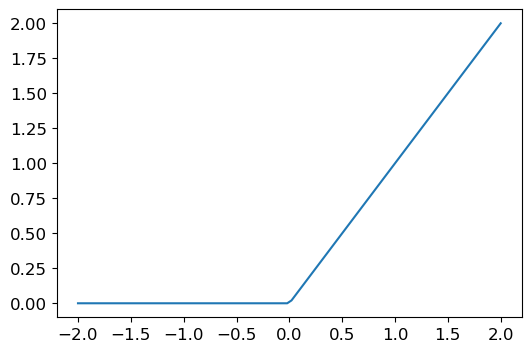

In [77]:
plot_function(F.relu)

<b>
35. What is a activation function?
</b>

The activation function is another function that is part of the neural network, which has the purpose of providing non-linearity to the model. The idea that without an activation function, we just have multiple linear functions of the form y=my+b. However, a series of linear layers is equivalent to a single linear layer, so our model can only fit a line to the data. By introducing a non-linearity in between the linear layers, this is not longer true. Each layer is somewhat decoupled from the rest of the layers, and the model can now fit much more complex functions. In fast, it can be mathematically proven that such a model can solve any computable problem to any possible a high accuracy, if the model is large enough with thr correct weights. This is known as the universal approximation theorem.

<b>
36. What's the difference between F.rulu and nn.ReLUJ?
</b>

F.relu is a Python function for the relu activation function. On the other hand, nn.ReLU is a PyTorch module. This means that it is a Python class that can be balled as a function in the same way as F.relu.

<b>
37. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?
</b>

There are practical performance benefits to using more than one onlineartiy. We can use a deeper model with less number of parameters, better performance, faster training, and less compute/memory requirements.